# Color Palette Extractor 


## Overview
This notebook accompanies my Color Palette Extractor script, which extracts color palettes from images. It uses a combination of novel techniques (I think) to accurately capture the most representative colors in an image.

Color Palette Extractor uses KMeans Clustering, which is an algorithm commonly used for image segmentation. By dividing the colors in the image into different clusters, the KMeans algorithm helps to identify the most dominant colors in the image.

Added to the KMeans algorithm is my labeling function, which applies a broad hue-range label to each pixel's color in an image, which is then used to determine whether there are colors present in the image that may not be captured by the KMeans algorithm. If so, the script can return those colors in the extracted palette.

Below I will discuss why I chose to use the HSL color space. 
I will then discuss the advantages of my Color Palette Extractor over other methods, including a deep learning method. I will conclude by comparing results.


# Why HSL?
### More Intuitive
 HSL divides colors up in a way that is more intuitive than RGB, since all colors in HSL can be thought of as degrees on a color wheel (from 0 to 360).
 
 http://www.workwithcolor.com/red-color-hue-range-01.htm


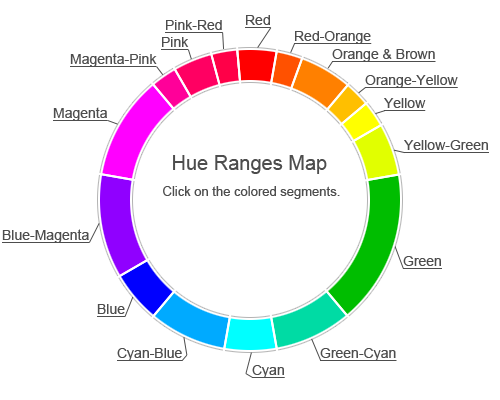

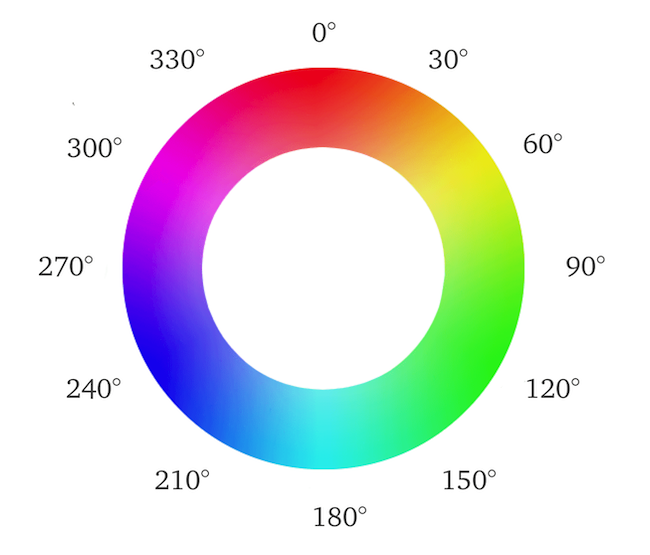

https://shreyasminocha.me/blog/hsl-intuition/

### Easier to Manipulate
HSL is easier to manipulate. This is especially true when you need to adjust the hue of a color while maintaining specific levels of saturation and lightness, or vice-versa. RGB mixes red, green, and blue channels to produce a color. As a result, there does not appear to be a consistent and obvious way to adjust color values to produce greys and browns. For example, finding the threshold values that turn orange into brown can be done by leaving the hue alone and adjusting the saturation and lightness values in HSL. This would be a difficult task with RGB.

### Examples

Consider these colors:

In [36]:
HTML(base_swatches_html)

**Whites:**  
We can get whites / off white by adjusting only Lightness and Saturation, leaving Hue alone (look closely):

In [39]:
HTML(white_swatches_html)

**Browns:**  
Similarly, we can get browns for certain hues by adjusting only Lightness and Saturation:

In [40]:
HTML(brown_swatches_html)

**Greys:**  
Finally, we can get shades of grey by adjusting Lightness and Saturation for each hue:

In [41]:
HTML(grey_swatches_html)

### H-Range Labeling Function
The appropriate Lightness and Saturation values for relevant hue ranges was descided through trial and error. Blacks and Whites appear for any hue, when Lightness is below 15 or above 98, respectively. This was set first. Then Lightness value intervals were chosen and Saturation thresholds were set for each interval to determine greys (for all hues) and browns (for certain hues). This was the result:

def get_h_range_color_name(hsl_pixel):
    """Return the color label based on the hue value."""
    h, s, l = hsl_pixel
        
    color_dict = {
        (0.0, 11): "Reds",
        (11, 21): "Red-Oranges",
        (21, 45): "Oranges",
        (45, 68): "Yellows",
        (68, 75): "Yellow-Greens",
        (75, 140): "Greens",
        (140, 180): "Cyans",
        (180, 220): "Blues",
        (220, 299): "Purples",
        (299, 330): "Magenta-Pinks",
        (330, 360): "Pinks"
    }
    
    for range_, color_name in color_dict.items():
        lower, upper = range_
        if lower <= h < upper:
            return color_name

    else:
        print(f"The hue value {h} is not within any specified range.")



def get_pixel_color_label(hsl_pixel):
    """Return the color label for a pixel in HSL format."""

    color_label = get_h_range_color_name(hsl_pixel)
    h, s, l = (hsl_pixel)
    
    #Check for Black and White
    if l < 15:
        color_label = "Blacks"
    elif l > 98:
        color_label = "Whites" 
    
    #Check s and l ranges for Browns and Greys
    elif l >= 13 and l < 15:
        if color_label not in ["Oranges", "Red-Oranges", "Yellows", "Reds", "Pinks"]:
            if s < 74:
                color_label = "Dark-Greys"
        else:
            if 74 < s < 99:
                 color_label = "Dark-Browns"

        
    elif l >= 15 and l < 20:
        if color_label not in ["Oranges", "Red-Oranges", "Yellows", "Reds", "Pinks"]:
            if s < 25:
                color_label = "Dark-Greys"
        elif 30 < s < 98:
            color_label = "Dark-Browns"
        
    elif l >= 20 and l < 25:
        if color_label not in ["Oranges", "Red-Oranges", "Yellows", "Reds", "Pinks"]:
            if s < 20:
                color_label = "Dark-Greys"
        elif color_label in ["Reds", "Pinks"]:
            if 15 < s < 50:
                color_label = "Dark-Browns"
        else:
            if 20 < s < 97:             
                color_label = "Dark-Browns"
                

    elif l >= 25 and l < 30:
        if color_label not in ["Oranges", "Red-Oranges", "Yellows", "Reds", "Pinks"]:
            if s < 17:
                color_label = "Dark-Greys"
        elif color_label in ["Reds", "Pinks"]:
            if 17 < s < 30:
                color_label = "Dark-Browns"
        else: 
            if 19 < s < 90:
                color_label = "Dark-Browns"


    elif l >= 30 and l < 35:
        if color_label not in ["Oranges", "Red-Oranges", "Yellows"]:
            if s < 16:
                color_label = "Dark-Greys"  
        elif color_label in ["Reds", "Pinks"]:
            if 17 < s < 30:
                color_label = "Dark-Browns"         
        elif 17 < s < 85:
            color_label = "Dark-Browns"
            


    elif l >= 35 and l < 45:
        if color_label not in ["Oranges", "Red-Oranges"]:
            if s < 14:
                color_label = "Dark-Greys"
        elif color_label == "Reds":
            if 14 < s < 45:
                color_label = "Dark-Browns"
        elif 14 < s < 65:
                color_label = "Dark-Browns"
        
        


    elif l >= 45 and l < 50:
        if color_label not in ["Oranges", "Red-Oranges"]:
            if s < 12:
                color_label = "Dark-Greys"
        elif 12 < s < 60:
            color_label = "Dark-Browns"
        


    elif l >= 50 and l < 60:
        if color_label not in ["Oranges", "Red-Oranges"]:   
            if s < 12:
                color_label = "Light-Greys / Off-Whites" 
        elif color_label == "Reds":
            if 12< s < 23:
                color_label = "Light-Browns / Tans"
        elif 12 < s < 65:
            color_label = "Light-Browns / Tans"
       


    elif l >= 60 and l < 70:
        if color_label not in ["Oranges", "Red-Oranges"]:
            if s < 14:
                color_label = "Light-Greys / Off-Whites"
        elif 14 < s < 75:
            color_label = "Light-Browns / Tans"



    elif l >= 70 and l < 80:
        if color_label not in ["Oranges", "Red-Oranges"]:
            if s < 20:
                color_label = "Light-Greys / Off-Whites"
        elif 20 < s < 85:
            color_label = "Light-Browns / Tans"
        


    elif l >= 80 and l < 85:
        if color_label not in ["Oranges", "Red-Oranges"]:
            if s < 30:
                color_label = "Light-Greys / Off-Whites"
        elif 30 < s < 90:
            color_label = "Light-Browns / Tans"
        


    elif l >= 85 and l < 90:
        if color_label not in ["Oranges", "Red-Oranges"]:
            if s < 43:
                color_label = "Light-Greys / Off-Whites"
        elif 43 < s < 91:
            color_label = "Light-Browns / Tans"


    elif l >= 90 and l < 91:
        if color_label not in ["Oranges", "Red-Oranges"]:
            if s < 44:
                color_label = "Light-Greys / Off-Whites"            
        elif 44 < s < 93:
            color_label = "Light-Browns / Tans"
        


    elif l >= 91 and l < 93:
        if color_label not in ["Oranges", "Red-Oranges"]:
            if s < 50:
                color_label = "Light-Greys / Off-Whites"  
        elif 50 < s < 96:
            color_label = "Light-Browns / Tans"
        


    elif l >= 93 and l < 96:
        if color_label not in ["Oranges", "Red-Oranges"]:
            if s < 55:
                color_label = "Light-Greys / Off-Whites"
        elif 55 < s < 97:
            color_label = "Light-Browns / Tans"
        


    elif l >= 96 and l < 97:
        if color_label not in ["Oranges", "Red-Oranges"]:
            if s < 65:
                color_label = "Light-Greys / Off-Whites"
        elif 65 < s < 98:
              color_label = "Light-Browns / Tans"
        


    elif l >= 97 and l < 98:
        if color_label not in ["Oranges", "Red-Oranges"]:
            if s < 75:
                color_label = "Light-Greys / Off-Whites"
        elif 75 < s < 98:
            color_label = "Light-Browns / Tans"


    elif l >= 98 and l < 99:
        if color_label not in ["Oranges", "Red-Oranges"]:
            if s < 90:
                color_label = "Light-Greys / Off-Whites"
        elif 90 < s < 99:
            color_label = "Light-Browns / Tans"

    return color_label


### Why a labeling function?

Other color palette extractors simply use KMeans to extract a palette. Others use deep learning. This color palette extractor takes a slightly different approach by incorporating a labeling function into the script. This gets around some problems that might be encountered in a straightforward KMeans Clustering palette extraction. For example:



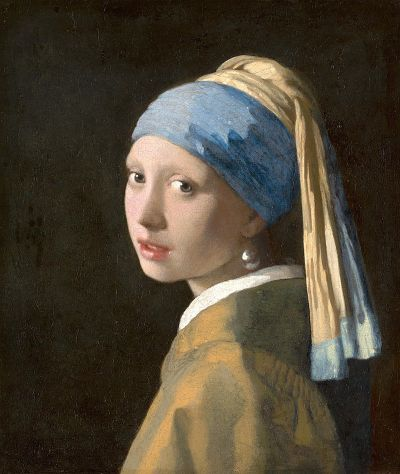

A straightforward KMeans Alogrithm might return the following color Palette:

In [42]:
HTML( KMEANS_PALETTE)

**Problem:**  
The problem is that is will sometimes fail to capture colors that are important for the palette, e.g. if they are highly contrastive. This will often happen when the contrasting or "unique" colors are not very numerous. The KMeans algorithm tends to "average" them out with the other colors. In the picture above, we might want notice that the highly contrastive Reds of the girls lips are not present in the extracted palette. 

**More Clusters?:**
We might consider increasing the number of clusters. However, this will not always work:

In [43]:
HTML(KMEANS_W_MORE_CLUSTERS)

**Solution: Labeling**  

My approach to this problem was to incorporate a function that can broadly label the colors in the color palette. It then labels each pixel in the image (the image is first re-sized). Then the function can determine whether there are important colors in the image that are not captured by the KMeans algorithm. If so, we can return it.
  
  
The script uses several steps to determine which unique colors should be returned. The thresholds are adjustable, as is how we define similarity of colors. 

**Function to Identify Unique Colors:**

In [44]:
def identify_unique_colors(pixel_color_labels_list, hsl_pixels, cluster_center_palette, cluster_color_labels, min_count=225, max_count=1000):

    # Create an empty dictionary to store counts of each unique color
    color_counts = {}

    # Go through each color label and count how many times it appears
    for label in pixel_color_labels_list:
        if label not in cluster_color_labels:
            if label not in color_counts:
                color_counts[label] = 1
            else:
                color_counts[label] += 1

    # Keep only colors with counts between the minimum and maximum thresholds
    unique_color_labels = [label for label, count in color_counts.items() if min_count < count]


    # If there are no unique colors, return an empty list
    if not unique_color_labels:        
        #print("No Unique Color Pixel Values")
        #print( "No Unique Color Labels")
        return [], []


    # Get the pixel values for the unique colors
    unique_color_pixels = np.array([hsl_pixels[i] for i, label in enumerate(pixel_color_labels_list) if label in unique_color_labels])

    # Create a list of labels that correspond to the unique color pixels
    unique_color_labels_final = [label for i, label in enumerate(pixel_color_labels_list) if (label in unique_color_labels) and (hsl_pixels[i] in unique_color_pixels)]

    
    unique_color_labels = unique_color_labels_final

    counts = collections.Counter(unique_color_labels)

    #print(counts)

    return unique_color_pixels, unique_color_labels


**Similarity Function**  
This function determines whether the "unique" colors are different enough to warrent being included as a new color in the palette. 

In [45]:
def compare_color_labels(unique_color_labels, unique_color_pixels, cluster_color_labels):
    # This function looks at the pixel color labels and the main color palette color labels and determines whether they are similar enough to ignore. 

    black_similar = ["Blacks", "Dark-Greys", "Dark-Browns"]
    blue_similar = ["Blues", "Purples"]
    red_orange_similar = ["Red-Oranges", "Reds", "Oranges"]
    brown_similar = ["Dark-Browns", "Light-Browns / Tans", "Yellows"]
    grey_similar = ["Dark-Greys", "Light-Greys / Off-Whites"]
    green_similar = ["Greens", "Cyans", "Yellow-Greens"]
    white_similar = ["Whites", "Light-Greys / Off-Whites"]
    yellow_similar = ["Yellows", "Oranges", "Yellow-Greens"]
    pink_similar = ["Pinks", "Magenta-Pinks"]

    # Make copies of the input lists to avoid modifying them during iteration
    unique_color_labels_copy = unique_color_labels.copy()
    unique_color_pixels_list = list(unique_color_pixels)

     # Loop through each color label in unique colors in reverse order
    indices_to_remove = []
    for i, unique_color_label in enumerate(reversed(unique_color_labels_copy)):
        for cluster_color_label in cluster_color_labels:
            if (cluster_color_label in black_similar and unique_color_label in black_similar) or \
               (cluster_color_label in blue_similar and unique_color_label in blue_similar) or \
               (cluster_color_label in red_orange_similar and unique_color_label in red_orange_similar) or \
               (cluster_color_label in grey_similar and unique_color_label in grey_similar) or \
               (cluster_color_label in green_similar and unique_color_label in green_similar) or \
               (cluster_color_label in brown_similar and unique_color_label in brown_similar) or \
               (cluster_color_label in white_similar and unique_color_label in white_similar) or \
               (cluster_color_label in yellow_similar and unique_color_label in yellow_similar) or \
               (cluster_color_label in pink_similar and unique_color_label in pink_similar):
                indices_to_remove.append(len(unique_color_labels_copy) - 1 - i)
                break  # Move on to the next unique color label

    # Remove the similar color labels and pixels from the original lists.
    for i in sorted(indices_to_remove, reverse=True):
        unique_color_labels.pop(i)
        unique_color_pixels_list.pop(i)

    unique_color_labels_dissimilar = unique_color_labels
    #print( 'Color Labels after Similarity Function', np.unique(unique_color_labels_dissimilar))

    # Convert the pixels list back to a numpy array.
    unique_color_pixels_dissimilar = np.array(unique_color_pixels_list)

    #print("unique_color_labels_dissimilar length", len(unique_color_labels))
    return unique_color_labels_dissimilar, unique_color_pixels_dissimilar

**Most Constrasting Color Selector**  
Finally, the most interesting color label is selected, as is the most interesting HSL value. 
This is somewhat subjective and could be adjusted.
After an image is categorized according to its pixel's colors, a priority is set for the most contrasting labels for the given category. Only those labels are kept. 

Finally, from among that list of color labels, an HSL value is chosen that is both representative of the image as well as interesting. This is also somewhat subjective.

In [46]:
#This function sets color priorities for each category and returns the first color label with the highest priority that appears in the unique colors. 
def select_most_contrasting_label(image_category, unique_color_labels_dissimilar):
    priorities = {
        "Brownish": ["Purples", "Reds", "Red-Oranges", "Pinks", "Cyans", "Greens",],
        "Yellowish": ["Reds", "Red-Oranges",  "Magenta-Pinks", "Pinks" , "Blues", "Cyans", "Purples", "Greens"],
        "Greenish": ["Reds", "Red-Oranges", "Oranges", "Magenta-Pinks", "Pinks"],
        "Redish": ["Cyans", "Blues", "Greens", "Violet-Blues"],
        "Blueish": ["Reds", "Yellows", "Red-Oranges", "Oranges", "Magenta-Pinks", "Pinks"],
        "White-ish": ["Blacks", "Dark-Greys", "Reds", "Red-Oranges", "Oranges", "Magenta-Pinks", "Pinks", "Greens", "Cyans", "Blues", "Purples"],
        "Blackish" : ["Whites", "Reds", "Red-Oranges", "Oranges", "Magenta-Pinks", "Pinks", "Greens", "Cyans", "Blues", "Violet-Blues", "Purples"],
        "Varied" : ["Reds", "Blues", "Greens"],
        "Greyish" : ["Reds", "Red-Oranges", "Oranges", "Magenta-Pinks", "Pinks", "Greens", "Cyans", "Blues"]
    }
    
    if image_category in priorities:
        for label in priorities[image_category]:
            if label in unique_color_labels_dissimilar:
                return label
    return None



#This function removes all of the color's with labels that are too similar, as determined by the similarity function
def pop_unique_similars(most_contrasting_label, unique_color_labels_dissimilar, unique_color_pixels_dissimilar):

    new_unique_color_pixels = []
    for i, label in enumerate(unique_color_labels_dissimilar):
        if label == most_contrasting_label:
             new_unique_color_pixels.append(unique_color_pixels_dissimilar[i])
              
    return   new_unique_color_pixels




#This function tries to extract the most visually interesting color from among the unique color pixels. It tries to balance visual interest with what is appropriate for the image.   
def get_most_interesting_color(new_unique_color_pixels):
    if not new_unique_color_pixels:
        return None

    # Fits new_unique_color_pixels to KMeans classifier so we can select a more representative color than just an average.
    new_unique_color_pixels = np.array(new_unique_color_pixels)
    unique_clf = KMeans(n_clusters=10, n_init= 'auto') 
    unique_clf.fit(new_unique_color_pixels)  

    # Get the cluster centers and their HSL values
    unique_cluster_centers = unique_clf.cluster_centers_
    #print("UNIQUE CLUSTER CENTERS:", unique_cluster_centers)
    

    # Find the cluster center with the highest saturation value
    s_values = [hsl[2] for hsl in unique_cluster_centers]
    highest_s_value = np.argmax(s_values)
    s = s_values[highest_s_value]

    # Find the cluster center with the lightness value closest to 50. 
    l_values = [hsl[1] for hsl in unique_cluster_centers]
    closest_to_50_index = np.argmin(np.abs(np.array(l_values) - 50))
    l = l_values[closest_to_50_index]

    # Get the average hue value
    h_values = [hsl[0] for hsl in unique_cluster_centers]
    h = sum(h_values) / len(h_values)


    #print( "MOST INTERESTING HSL BEFORE MODIFICATION", h, s, l )

        #If l is below 35, and s is below 40, raise them
    if l < 35:
        l = 35
    if l < 36 and s < 40:
        s = 40

    #If too saturated, reduce it
    if s > 85:
        s = 75



    #print(h, s, l)
    return (h, s, l)

## Results

This is the result of my approach. Notice it is able to return the red of the girl's lips.

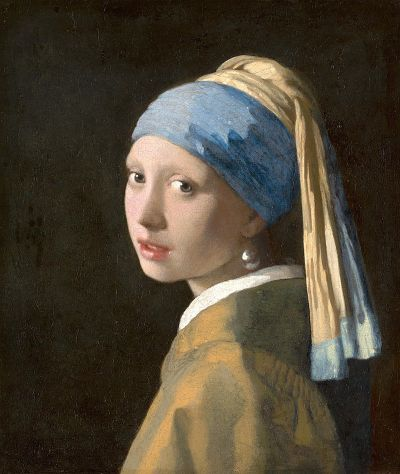

In [47]:
HTML(results_with_labeling)

### Comparison to Deep Learning Palette Extractor


**Colormind**  
Colormind is a color palette extractor that utilizes Deep Learning. 
It uses a "brute-force technique" called "generative-MMCQ". It is a classifier trained on a set of hand selected images. 
http://colormind.io/image/

Lets compare its results to mine.

Colormind Results:
Granted, colormind is designed to resturn a pleasing palette rather than prioritizing representativeness. Still, even after regenerating the palette more than 10 times, it never returned a Red hue in the palette.

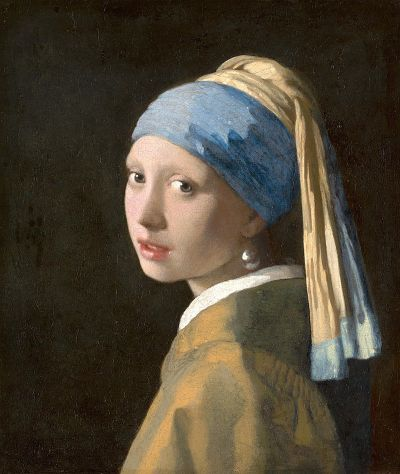

In [48]:
HTML(colormind_results)

## Conclusion 

In conclusion, my Color Palette Extractor script offers an effective and efficient way to extract color palettes from images. By utilizing the HSL color space and by incorporating a labeling function in addition to KMeans Clustering, my approach can produce color palettes that accurately capture the most important colors in an image.   
  
Compared to other approaches, such as the deep learning approach of Colormind, my method offers more control and precision in determining the most representative colors in an image. While there are limitations, my Color Palette Extractor is fairly accurate and a useful tool.

Code to handle the images above:

In [49]:
from IPython.display import HTML

#define base color swatches
colors = ['#00AAFF', '#FFD500', '#FF0000', '#9D00FF', '#EB285C']  # Replace with your desired hex color codes
swatch_size = 150  

base_swatches_html = ""
for color in colors:
    swatch_html = f"<div style='background-color: {color}; width: {swatch_size}px; height: {swatch_size}px; display: inline-block; margin-right: 5px;'></div>"
    base_swatches_html += swatch_html
    
    
# Define white swatches
colors = ['#FAFDFF', '#FFFEFA', '#FDFAFA', '#FDFAFF', '#FFFAFB']  
swatch_size = 150  

white_swatches_html = ""
for color in colors:
    swatch_html = f"<div style='background-color: {color}; width: {swatch_size}px; height: {swatch_size}px; display: inline-block; margin-right: 5px;'></div>"
    white_swatches_html += swatch_html

    
#Define grey swatches
colors = ['#2E2D34', '#1COA75', '#2AOOFF', '#BCBAC4', '#E4E3E8']  
swatch_size = 150  

grey_swatches_html = ""
for color in colors:
    swatch_html = f"<div style='background-color: {color}; width: {swatch_size}px; height: {swatch_size}px; display: inline-block; margin-right: 5px;'></div>"
    grey_swatches_html += swatch_html
    
#Define brown swatches
colors = ['#3D2105', '#76400A', '#FF8000', '#F5BF89', '#F9D9B8']  
swatch_size = 150  

brown_swatches_html = ""
for color in colors:
    swatch_html = f"<div style='background-color: {color}; width: {swatch_size}px; height: {swatch_size}px; display: inline-block; margin-right: 7px;'></div>"
    brown_swatches_html += swatch_html
    
    
#Straightforward KMEANS Palette:
colors = ['#131316', '#FEF8F1', '#DFC74E', '#95ADF3', '#536EF3']  
swatch_size = 150  

KMEANS_PALETTE = ""
for color in colors:
    swatch_html = f"<div style='background-color: {color}; width: {swatch_size}px; height: {swatch_size}px; display: inline-block; margin-right: 7px;'></div>"
    KMEANS_PALETTE += swatch_html
    
    
# MORE clusters
colors = ['#E7D67E', '#0E0801', '#131316', '#FEF8F1', '#DFC74E', '#95ADF3', '#536EF3']  
swatch_size = 100  

KMEANS_W_MORE_CLUSTERS = ""
for color in colors:
    swatch_html = f"<div style='background-color: {color}; width: {swatch_size}px; height: {swatch_size}px; display: inline-block; margin-right: 7px;'></div>"
    KMEANS_W_MORE_CLUSTERS += swatch_html

# My Results
colors = ['#131316', '#FEF8F1', '#DFC74E', '#95ADF3', '#536EF3', '#F06060']  
swatch_size = 150  

results_with_labeling = ""
for color in colors:
    swatch_html = f"<div style='background-color: {color}; width: {swatch_size}px; height: {swatch_size}px; display: inline-block; margin-right: 7px;'></div>"
    results_with_labeling += swatch_html
    
# Colormind results
colors = ['#383326', '#6F8291', '#8399AA', '#B69B74', '#735E45']  
swatch_size = 150  

colormind_results = ""
for color in colors:
    swatch_html = f"<div style='background-color: {color}; width: {swatch_size}px; height: {swatch_size}px; display: inline-block; margin-right: 7px;'></div>"
    colormind_results += swatch_html